### Collect Data

https://archive.ics.uci.edu/ml/datasets/Online+Retail

### Load Data

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

In [9]:
df = pd.read_excel('Online Retail.xlsx')

Check dataset details

In [10]:
df.shape

(541909, 8)

In [11]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [12]:
df[df['CustomerID'].isnull()]

InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00       0.00         NaN  United Kingdom  
1443   2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444   2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445   2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446   2010-12-01 14:32:00       1.66         NaN  United Kingdom  
...                    ...        ...         ...             ...  
541536 2011-12-09 10:26:00       4.13         NaN  United Kingdom  
541537 2011-12-09 10:26:00       4.13         NaN  United Kingdom  
541538 2011-12-09 10:26:00       4.96         NaN  United Kingdom  
541539 2011-12-09 10:26:00      10.79         NaN  United Kingdom  
541540 2011-12-09 10:26:00    1714.17         NaN  United Kingdom  

[135080 rows x 8 columns]

In [93]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Remove missing values from the dataset

In [94]:
df.dropna(inplace=True)

In [95]:
df.shape

(406829, 8)

In [96]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Explore & Visualize Dataset

Number of Unique customers

In [97]:
len(df.CustomerID.unique())

4372

Geograhic information

In [98]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [99]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

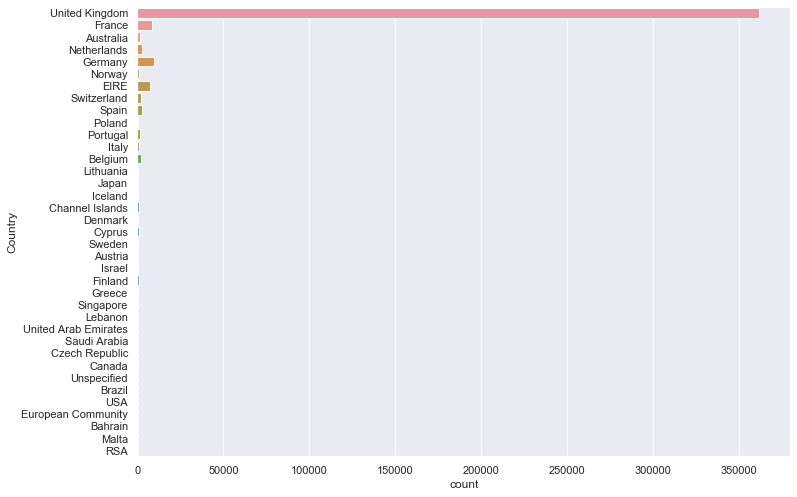

In [100]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(y='Country', data=df)

Lets remove Non-UK records as enough Geographic details about other countries/region is not available.

In [101]:
df = df[df.Country.isin(['United Kingdom'])]

In [102]:
df.shape

(361878, 8)

In [103]:
df.Country.unique()

array(['United Kingdom'], dtype=object)

Number of Unique Products

In [104]:
len(df.StockCode.unique())

3661

Invoice Date Range

In [105]:
df.InvoiceDate.min(), df.InvoiceDate.max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

### Remove Invoices for 'Returns'

Number of Returned invoices

In [106]:
df.InvoiceNo.str.startswith('C').sum()

7533

Remove these invoices from the dataset

In [107]:
df = df[~df.InvoiceNo.str.startswith('C').fillna(False)]

In [108]:
df.shape

(354345, 8)

### Build a Customer Dataset

In [109]:
cust_df = pd.DataFrame(df.CustomerID.unique(), columns=['CustomerID'])

In [110]:
cust_df.columns

Index(['CustomerID'], dtype='object')

### Recency of Purchase

In [111]:
df['Recency'] = (pd.datetime(2011,12,10) - pd.to_datetime(df['InvoiceDate'])).dt.days

In [112]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Recency  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom      373  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom      373  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom      373  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom      373  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom      373

In [113]:
recency_df = df.groupby('CustomerID', as_index=False).agg({'Recency':'min'})

By taking min for recency we are just taking into considering the last visit not the visits before them
so we can take median too 
or else we can make a new column with max which wil give us the first visit of the customer

In [114]:
recency_df.shape

(3921, 2)

In [115]:
cust_df = cust_df.merge(recency_df, left_on='CustomerID', right_on='CustomerID')

In [116]:
cust_df.shape

(3921, 2)

In [117]:
cust_df

CustomerID  Recency
0        17850.0      372
1        13047.0       31
2        13748.0       95
3        15100.0      333
4        15291.0       25
5        14688.0        7
6        17809.0       16
7        15311.0        0
8        16098.0       87
9        18074.0      373
10       17420.0       50
11       16029.0       38
12       16250.0      261
13       17511.0        2
14       13705.0        7
15       13747.0      373
16       13408.0        1
17       13767.0        2
18       17924.0       11
19       13448.0       16
20       15862.0        8
21       15513.0       33
22       16218.0       29
23       14045.0      109
24       14307.0       88
25       17908.0      373
26       17920.0        4
27       12838.0       33
28       13255.0        9
29       16583.0      373
...          ...      ...
3891     13560.0        7
3892     15539.0        7
3893     13017.0        7
3894     18174.0        7
3895     13153.0        5
3896     15773.0        5
3897     17936.0        5
3898     16535.0        5
3899     16988.0        5
3900     15097.0        4
3901     18015.0        4
3902     16597.0        4
3903     13790.0        4
3904     14219.0        4
3905     17383.0        4
3906     15992.0        3
3907     15318.0        3
3908     17914.0        3
3909     16528.0        3
3910     16569.0        3
3911     14578.0        3
3912     16000.0        2
3913     15195.0        2
3914     14087.0        2
3915     14204.0        2
3916     15471.0        2
3917     13436.0        1
3918     15520.0        1
3919     13298.0        1
3920     14569.0        1

[3921 rows x 2 columns]

### Frequency of Invoices

In [118]:
frequency_df = df.groupby('CustomerID', as_index=False).agg({'InvoiceNo':'count'})

In [119]:
frequency_df.shape

(3921, 2)

In [120]:
frequency_df

CustomerID  InvoiceNo
0        12346.0          1
1        12747.0        103
2        12748.0       4596
3        12749.0        199
4        12820.0         59
5        12821.0          6
6        12822.0         46
7        12823.0          5
8        12824.0         25
9        12826.0         91
10       12827.0         25
11       12828.0         56
12       12829.0         11
13       12830.0         38
14       12831.0          9
15       12832.0         27
16       12833.0         24
17       12834.0         18
18       12836.0        175
19       12837.0         12
20       12838.0        123
21       12839.0        314
22       12840.0        113
23       12841.0        420
24       12842.0         34
25       12843.0        103
26       12844.0         52
27       12845.0         27
28       12847.0         91
29       12849.0         51
...          ...        ...
3891     18242.0         78
3892     18245.0        175
3893     18246.0          4
3894     18248.0         47
3895     18249.0          8
3896     18250.0         21
3897     18251.0         16
3898     18252.0         98
3899     18255.0          6
3900     18257.0        118
3901     18259.0         42
3902     18260.0        134
3903     18261.0         21
3904     18262.0         13
3905     18263.0         61
3906     18265.0         46
3907     18268.0          1
3908     18269.0          7
3909     18270.0         11
3910     18272.0        166
3911     18273.0          3
3912     18274.0         11
3913     18276.0         14
3914     18277.0          8
3915     18278.0          9
3916     18280.0         10
3917     18281.0          7
3918     18282.0         12
3919     18283.0        756
3920     18287.0         70

[3921 rows x 2 columns]

In [121]:
cust_df = cust_df.merge(frequency_df, left_on='CustomerID', right_on='CustomerID')

In [122]:
cust_df.shape

(3921, 3)

In [123]:
cust_df

CustomerID  Recency  InvoiceNo
0        17850.0      372        297
1        13047.0       31        172
2        13748.0       95         28
3        15100.0      333          3
4        15291.0       25        103
5        14688.0        7        327
6        17809.0       16         61
7        15311.0        0       2379
8        16098.0       87         67
9        18074.0      373         13
10       17420.0       50         30
11       16029.0       38        242
12       16250.0      261         24
13       17511.0        2        963
14       13705.0        7         28
15       13747.0      373          1
16       13408.0        1        478
17       13767.0        2        368
18       17924.0       11         31
19       13448.0       16        195
20       15862.0        8        147
21       15513.0       33        308
22       16218.0       29         84
23       14045.0      109          6
24       14307.0       88        180
25       17908.0      373         58
26       17920.0        4        696
27       12838.0       33        123
28       13255.0        9         13
29       16583.0      373         14
...          ...      ...        ...
3891     13560.0        7         33
3892     15539.0        7         41
3893     13017.0        7          1
3894     18174.0        7          1
3895     13153.0        5         15
3896     15773.0        5         10
3897     17936.0        5         77
3898     16535.0        5         31
3899     16988.0        5          7
3900     15097.0        4         25
3901     18015.0        4         46
3902     16597.0        4          7
3903     13790.0        4         45
3904     14219.0        4          7
3905     17383.0        4         51
3906     15992.0        3          3
3907     15318.0        3         33
3908     17914.0        3         80
3909     16528.0        3         17
3910     16569.0        3          5
3911     14578.0        3         24
3912     16000.0        2          9
3913     15195.0        2          1
3914     14087.0        2         69
3915     14204.0        2         44
3916     15471.0        2         77
3917     13436.0        1         12
3918     15520.0        1         18
3919     13298.0        1          2
3920     14569.0        1         12

[3921 rows x 3 columns]

### Monetary Value of Purchases

Calculate total purchase price for each invoice

In [124]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [125]:
monetary_df =  df.groupby('CustomerID', as_index=False).agg({'Sales':'sum'})

In [126]:
monetary_df

CustomerID     Sales
0        12346.0  77183.60
1        12747.0   4196.01
2        12748.0  33719.73
3        12749.0   4090.88
4        12820.0    942.34
5        12821.0     92.72
6        12822.0    948.88
7        12823.0   1759.50
8        12824.0    397.12
9        12826.0   1474.72
10       12827.0    430.15
11       12828.0   1018.71
12       12829.0    293.00
13       12830.0   6814.64
14       12831.0    215.05
15       12832.0    383.03
16       12833.0    417.38
17       12834.0    312.38
18       12836.0   2612.86
19       12837.0    134.10
20       12838.0    683.13
21       12839.0   5591.42
22       12840.0   2726.77
23       12841.0   4022.35
24       12842.0   1118.99
25       12843.0   1702.26
26       12844.0    325.96
27       12845.0    354.09
28       12847.0    871.54
29       12849.0   1050.89
...          ...       ...
3891     18242.0   2232.49
3892     18245.0   2567.06
3893     18246.0    596.10
3894     18248.0    804.02
3895     18249.0     95.34
3896     18250.0    349.27
3897     18251.0   4314.72
3898     18252.0    526.67
3899     18255.0    103.30
3900     18257.0   2337.63
3901     18259.0   2338.60
3902     18260.0   2643.20
3903     18261.0    324.24
3904     18262.0    149.48
3905     18263.0   1213.16
3906     18265.0    801.51
3907     18268.0     25.50
3908     18269.0    168.60
3909     18270.0    283.15
3910     18272.0   3078.58
3911     18273.0    204.00
3912     18274.0    175.92
3913     18276.0    335.86
3914     18277.0    110.38
3915     18278.0    173.90
3916     18280.0    180.60
3917     18281.0     80.82
3918     18282.0    178.05
3919     18283.0   2094.88
3920     18287.0   1837.28

[3921 rows x 2 columns]

In [127]:
cust_df = cust_df.merge(monetary_df, left_on='CustomerID', right_on='CustomerID')

In [172]:
cust_df = cust_df.drop('CustomerID',axis=1)

In [173]:
cust_df

Recency  InvoiceNo     Sales
0         372        297   5391.21
1          31        172   3237.54
2          95         28    948.25
3         333          3    876.00
4          25        103   4668.30
5           7        327   5630.87
6          16         61   5411.91
7           0       2379  60767.90
8          87         67   2005.63
9         373         13    489.60
10         50         30    598.83
11         38        242  81024.84
12        261         24    389.44
13          2        963  91062.38
14          7         28    711.86
15        373          1     79.60
16          1        478  28117.04
17          2        368  17220.36
18         11         31   2962.50
19         16        195   3539.37
20          8        147    832.88
21         33        308  14758.22
22         29         84   3084.68
23        109          6   1659.75
24         88        180   2995.72
25        373         58    243.28
26          4        696   4204.10
27         33        123    683.13
28          9         13    399.51
29        373         14    233.45
...       ...        ...       ...
3891        7         33    174.37
3892        7         41    538.46
3893        7          1    204.00
3894        7          1    104.00
3895        5         15    486.22
3896        5         10    635.68
3897        5         77    389.84
3898        5         31    593.75
3899        5          7    126.12
3900        4         25    248.08
3901        4         46    120.03
3902        4          7     90.04
3903        4         45    348.80
3904        4          7     89.94
3905        4         51    199.29
3906        3          3     41.99
3907        3         33    312.62
3908        3         80    336.43
3909        3         17    244.41
3910        3          5    124.20
3911        3         24    168.63
3912        2          9  12393.70
3913        2          1   3861.00
3914        2         69    194.42
3915        2         44    161.03
3916        2         77    469.48
3917        1         12    196.89
3918        1         18    343.50
3919        1          2    360.00
3920        1         12    227.39

[3921 rows x 3 columns]

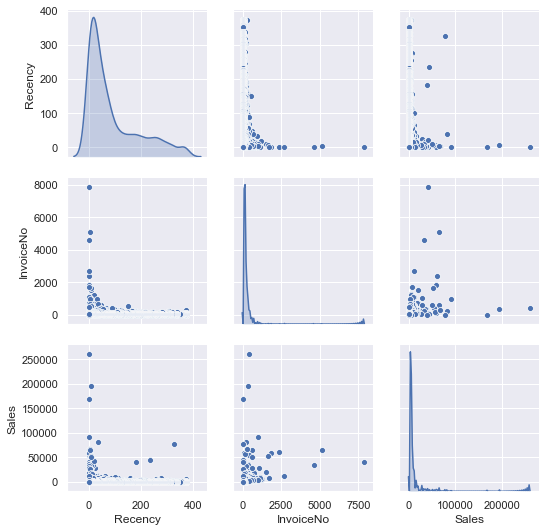

In [174]:
import seaborn as sns
sns.pairplot(cust_df,diag_kind='kde')

In [175]:
from scipy.stats import zscore
df_scaled = cust_df.apply(zscore)

In [176]:
df_scaled.head()

Recency  InvoiceNo     Sales
0  2.816413   0.948847  0.471503
1 -0.610177   0.374843  0.183617
2  0.032937  -0.286410 -0.122399
3  2.424516  -0.401211 -0.132056
4 -0.670469   0.057992  0.374870

In [177]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0              1    11763.000000
1              2     8506.794534
2              3     5462.764706
3              4     4005.164127
4              5     2854.443815
5              6     2155.709718
6              7     1750.192969
7              8     1476.689949
8              9     1280.257304
9             10     1134.553419
10            11     1007.729605
11            12      890.184062
12            13      789.820959
13            14      709.674896

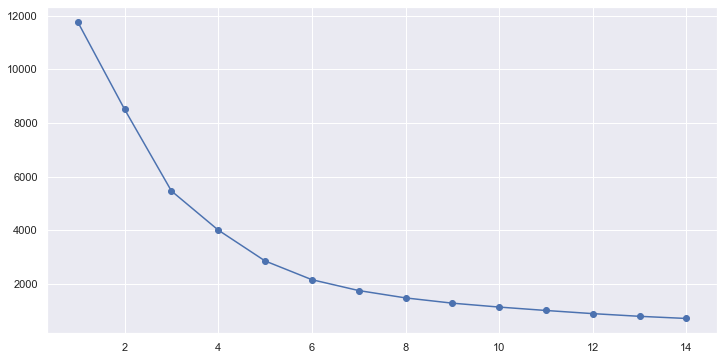

In [178]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### building kmeans models without pca

In [134]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [135]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [136]:
centroids = kmeans.cluster_centers_

In [137]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [138]:
centroid_df

CustomerID   Recency  InvoiceNo      Sales
0   -0.010799 -0.514926   0.054006   0.002491
1   -0.134087 -0.656401   8.435395  11.574613
2    0.033974  1.532843  -0.287918  -0.183272

In [139]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [140]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
retail_df_labeled = df_scaled.join(df_labels)
retail_df_labeled

CustomerID   Recency  InvoiceNo      Sales labels
0       1.451539  2.816413   0.948847   0.471503      2
1      -1.594847 -0.610177   0.374843   0.183617      0
2      -1.150226  0.032937  -0.286410  -0.122399      0
3      -0.292696  2.424516  -0.401211  -0.132056      2
4      -0.171551 -0.670469   0.057992   0.374870      0
5      -0.554014 -0.851345   1.086608   0.503539      0
6       1.425534 -0.760907  -0.134873   0.474270      0
7      -0.158866 -0.921685  10.509464   7.873846      1
8       0.340302 -0.047452  -0.107321   0.018944      0
9       1.593614  2.826462  -0.355291  -0.183708      2
10      1.178804 -0.419253  -0.277226  -0.169106      0
11      0.296538 -0.539836   0.696285  10.581643      1
12      0.436711  1.701013  -0.304778  -0.197096      2
13      1.236522 -0.901588   4.007142  11.923386      1
14     -1.177499 -0.851345  -0.286410  -0.153997      0
15     -1.150860  2.826462  -0.410395  -0.238513      2
16     -1.365876 -0.911636   1.780006   3.509323      0
17     -1.138174 -0.901588   1.274882   2.052736      0
18      1.498474 -0.811150  -0.272634   0.146851      0
19     -1.340506 -0.760907   0.480460   0.223963      0
20      0.190615 -0.841296   0.260042  -0.137820      0
21     -0.030744 -0.590080   0.999360   1.723615      0
22      0.416414 -0.630274  -0.029256   0.163183      0
23     -0.961848  0.173618  -0.387435  -0.027291      0
24     -0.795670 -0.037404   0.411579   0.151292      0
25      1.488326  2.826462  -0.148649  -0.216634      2
26      1.495937 -0.881490   2.781069   0.312819      0
27     -1.727409 -0.590080   0.149833  -0.157838      0
28     -1.462919 -0.831247  -0.355291  -0.195750      0
29      0.647922  2.826462  -0.350699  -0.217948      2
...          ...       ...        ...        ...    ...
3891   -1.269468 -0.851345  -0.263450  -0.225845      0
3892   -0.014253 -0.851345  -0.226714  -0.177176      0
3893   -1.613875 -0.851345  -0.410395  -0.221884      0
3894    1.657041 -0.851345  -0.410395  -0.235252      0
3895   -1.527615 -0.871442  -0.346107  -0.184159      0
3896    0.134166 -0.871442  -0.369067  -0.164181      0
3897    1.506086 -0.871442  -0.061400  -0.197043      0
3898    0.617477 -0.871442  -0.272634  -0.169786      0
3899    0.904800 -0.871442  -0.382843  -0.232295      0
3900   -0.294599 -0.881490  -0.300186  -0.215992      0
3901    1.556193 -0.881490  -0.203754  -0.233109      0
3902    0.656802 -0.881490  -0.382843  -0.237118      0
3903   -1.123586 -0.881490  -0.208346  -0.202529      0
3904   -0.851486 -0.881490  -0.382843  -0.237131      0
3905    1.155336 -0.881490  -0.180793  -0.222514      0
3906    0.273070 -0.891539  -0.401211  -0.243541      0
3907   -0.154426 -0.891539  -0.263450  -0.207365      0
3908    1.492132 -0.891539  -0.047624  -0.204182      0
3909    0.613037 -0.891539  -0.336923  -0.216483      0
3910    0.639042 -0.891539  -0.392027  -0.232551      0
3911   -0.623784 -0.891539  -0.304778  -0.226612      0
3912    0.278144 -0.901588  -0.373659   1.407544      0
3913   -0.232441 -0.901588  -0.410395   0.266956      0
3914   -0.935209 -0.901588  -0.098137  -0.223165      0
3915   -0.861000 -0.901588  -0.212938  -0.227628      0
3916   -0.057383 -0.901588  -0.061400  -0.186397      0
3917   -1.348117 -0.911636  -0.359883  -0.222835      0
3918   -0.026304 -0.911636  -0.332331  -0.203237      0
3919   -1.435646 -0.911636  -0.405803  -0.201031      0
3920   -0.629492 -0.911636  -0.359883  -0.218758      0

[3921 rows x 5 columns]

In [141]:
retail_clusters = retail_df_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
df0=retail_clusters.get_group(0)
df1=retail_clusters.get_group(1)
df2=retail_clusters.get_group(2)

In [142]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]

In [143]:
I0=0
I1=0
I2=0
for i in np.arange(df0.shape[0]):
  I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
  I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):  
  I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)

In [144]:
tot_I=I0+I1+I2
print(tot_I)

9382.337764510752


In [145]:
kmeans.inertia_

9382.337764510758

In [146]:
finaldf = pd.concat([df0,df1,df2])
finaldf.head()

CustomerID   Recency  InvoiceNo     Sales labels
1   -1.594847 -0.610177   0.374843  0.183617      0
2   -1.150226  0.032937  -0.286410 -0.122399      0
4   -0.171551 -0.670469   0.057992  0.374870      0
5   -0.554014 -0.851345   1.086608  0.503539      0
6    1.425534 -0.760907  -0.134873  0.474270      0

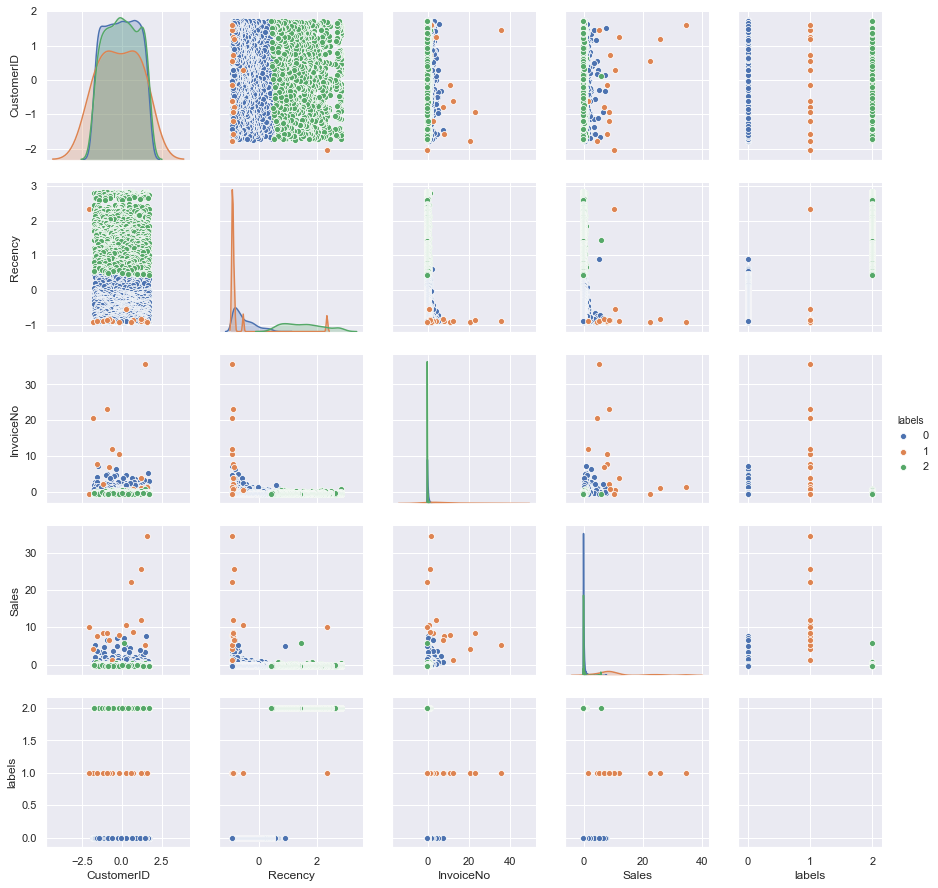

In [147]:
sns.pairplot(finaldf,diag_kind='kde',hue = 'labels')
plt.show()

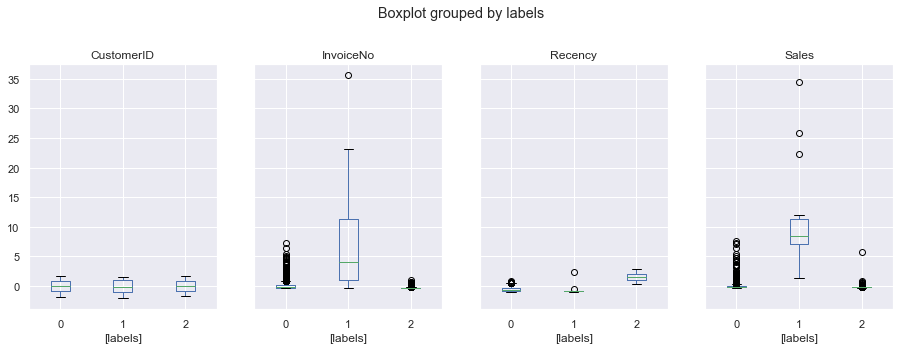

In [148]:
finaldf.boxplot(by='labels',layout=(2,4),figsize=(15,10))
plt.show()

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.36248417376257586


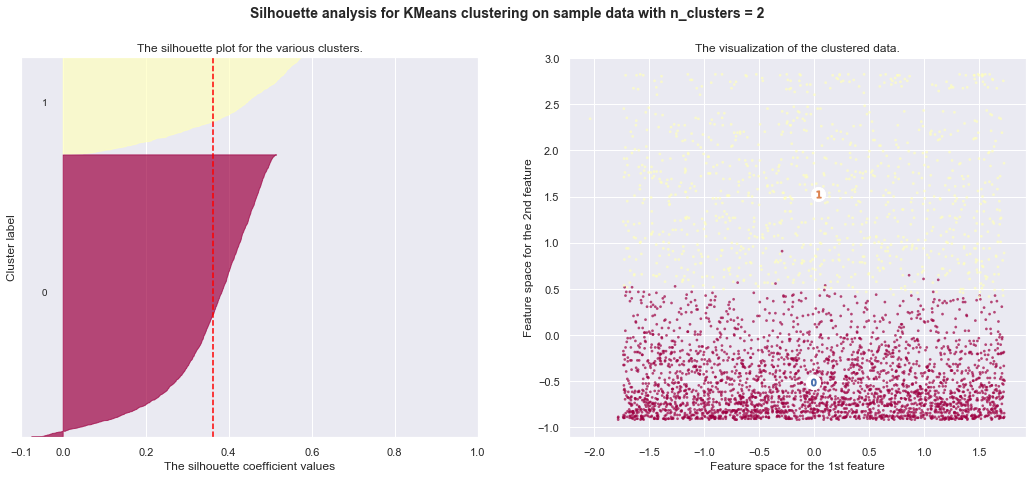

For n_clusters = 3 The average silhouette_score is : 0.38039028653820417


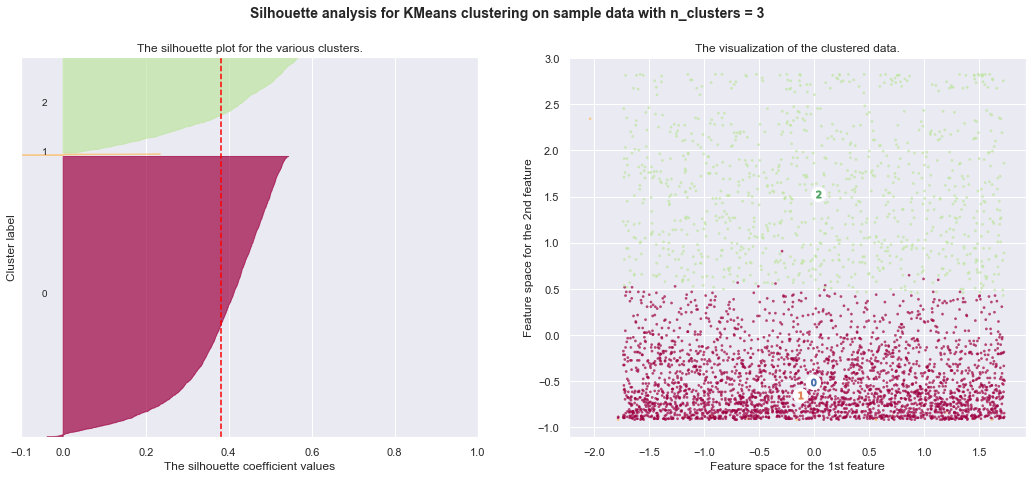

For n_clusters = 4 The average silhouette_score is : 0.3914199955816698


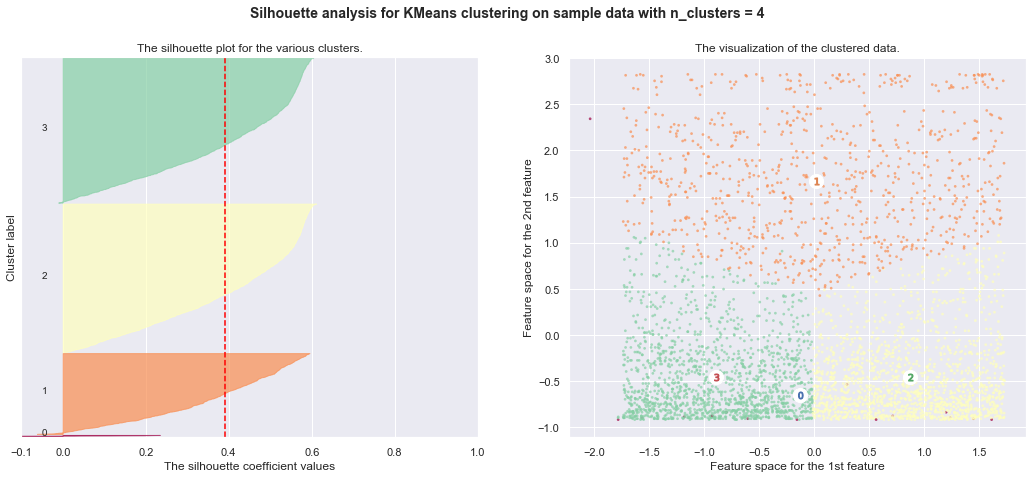

For n_clusters = 5 The average silhouette_score is : 0.38919336450697517


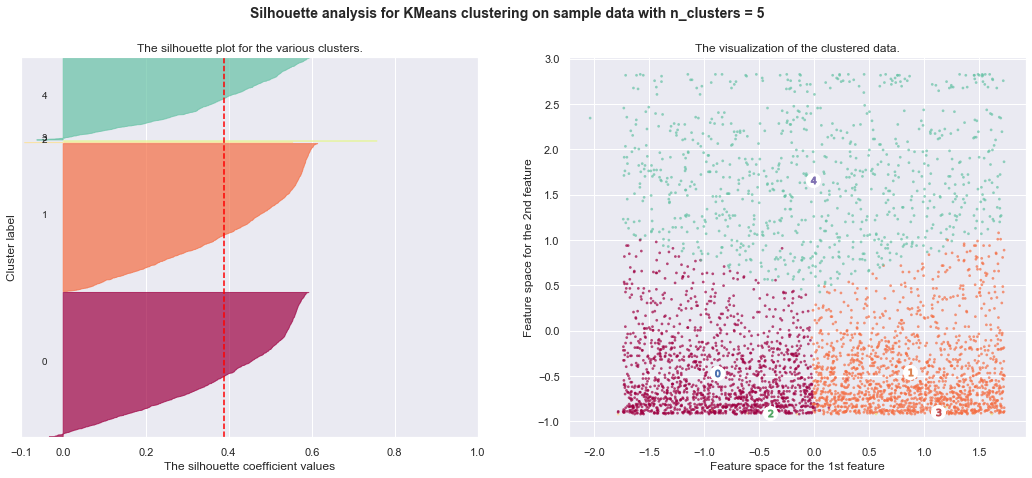

For n_clusters = 6 The average silhouette_score is : 0.4024062237341105


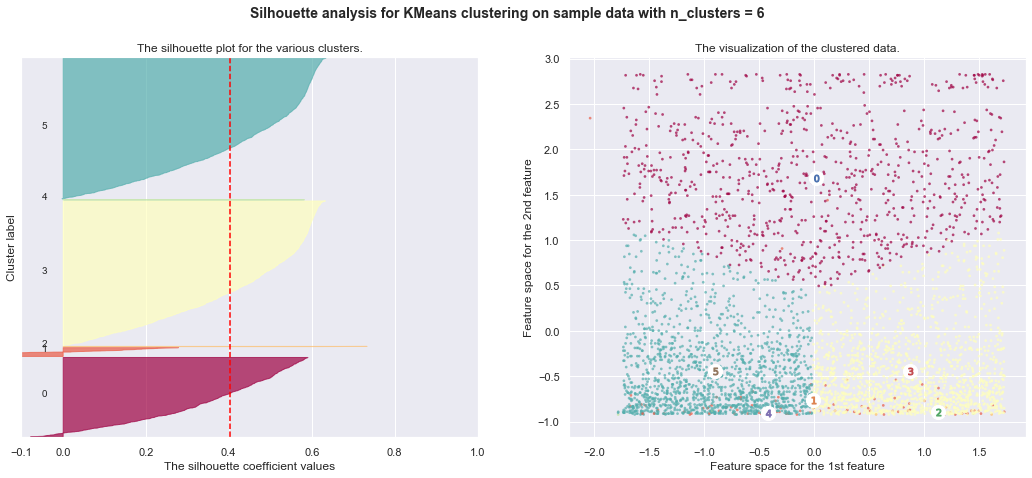

For n_clusters = 7 The average silhouette_score is : 0.40736972304885777


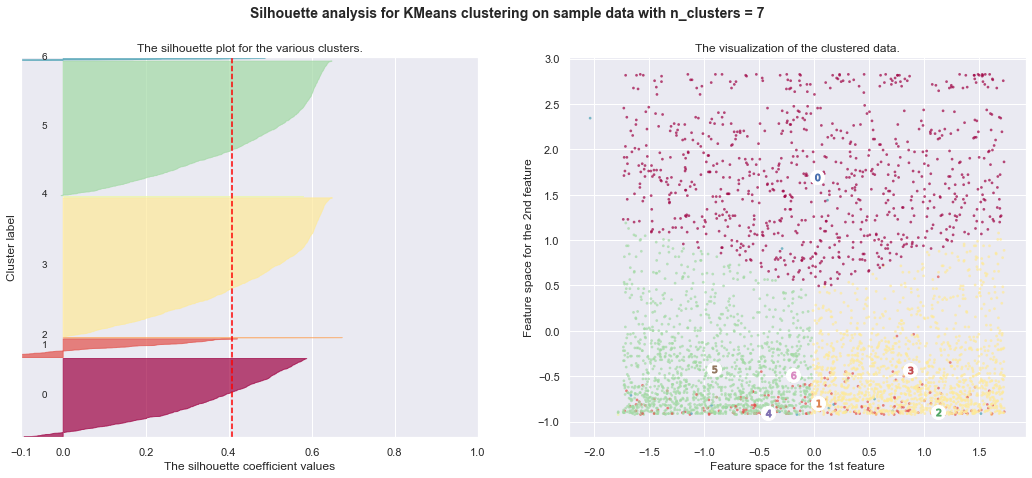

For n_clusters = 8 The average silhouette_score is : 0.40513356095399683


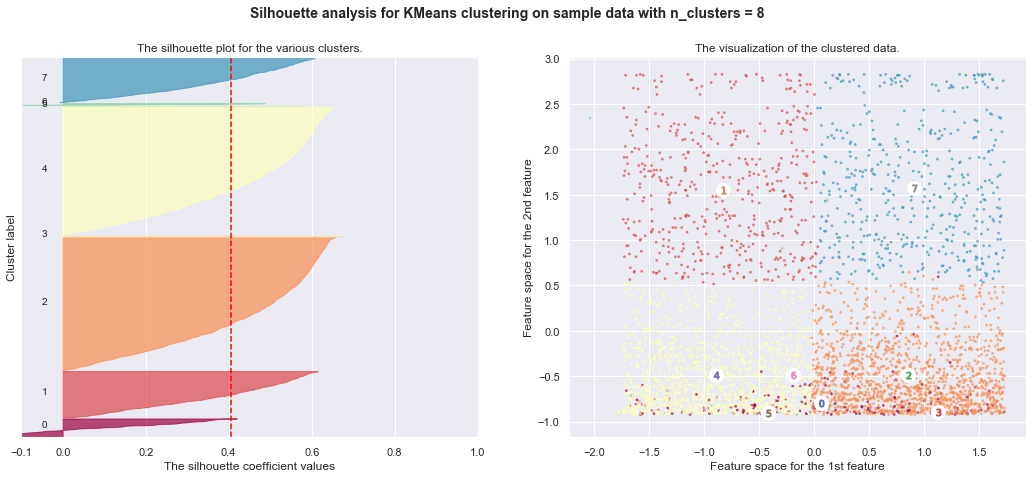

For n_clusters = 9 The average silhouette_score is : 0.3399574380150456


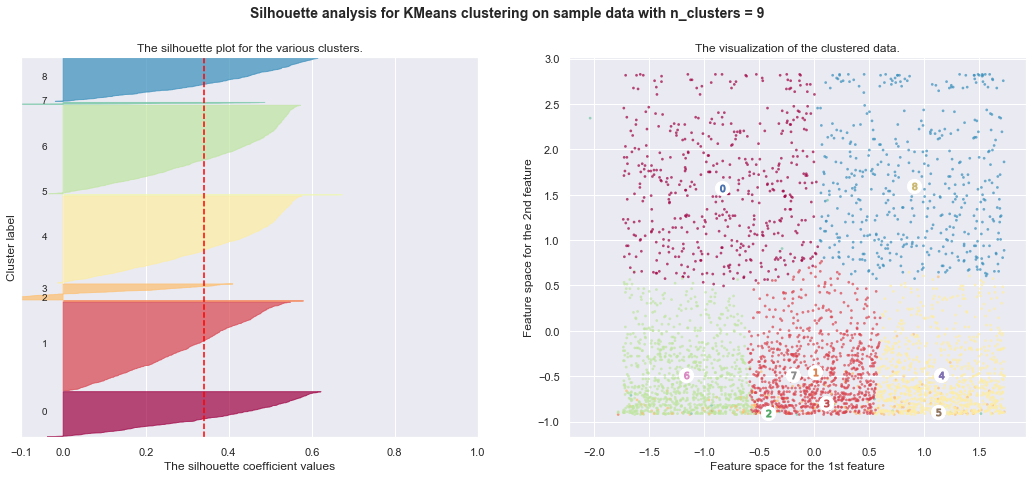

For n_clusters = 10 The average silhouette_score is : 0.34304506924250694


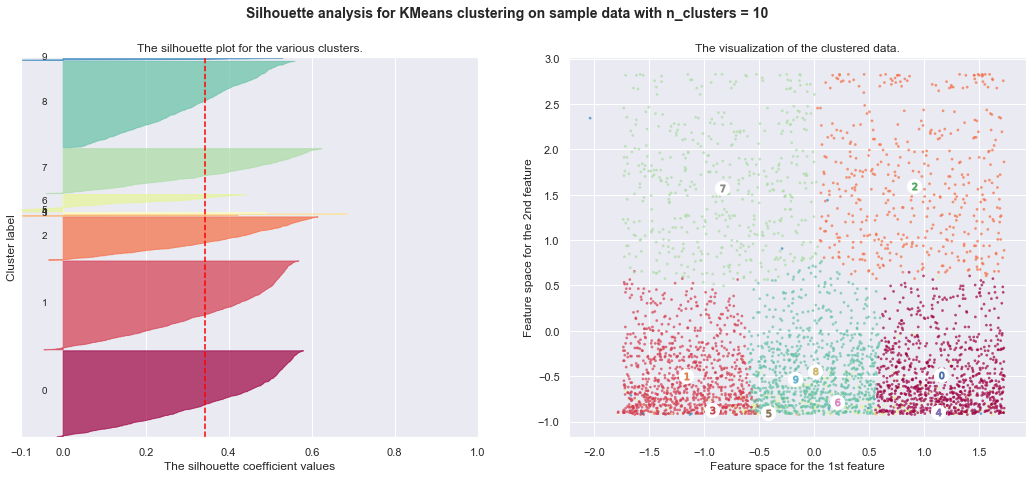

For n_clusters = 11 The average silhouette_score is : 0.3392414931267768


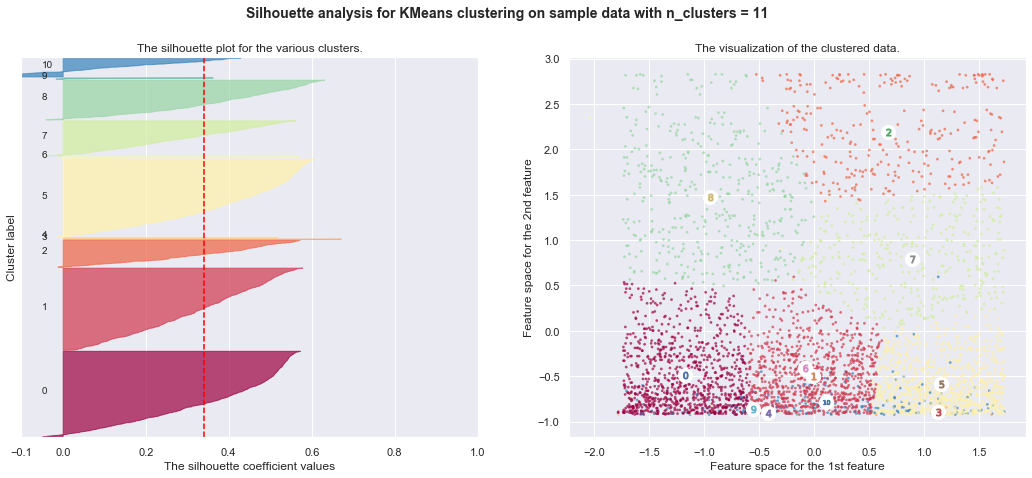

For n_clusters = 12 The average silhouette_score is : 0.28780859200858083


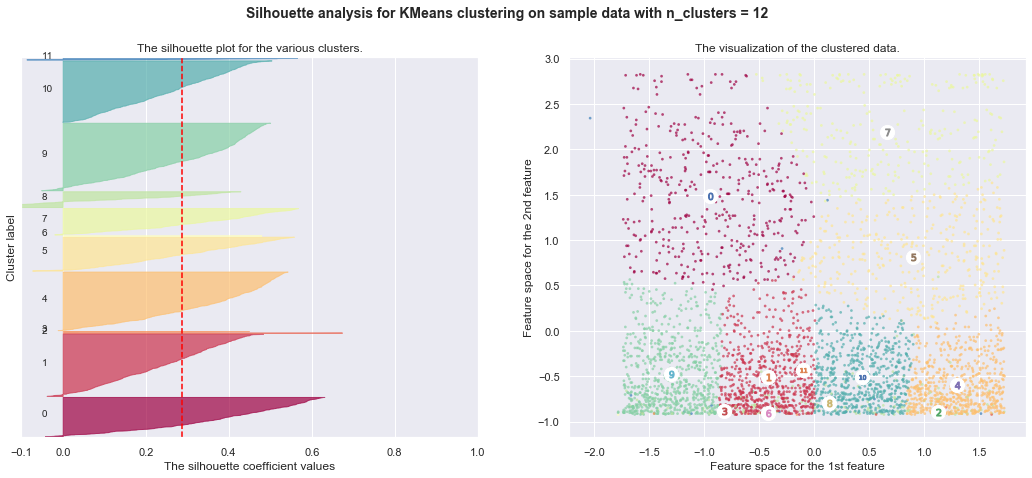

For n_clusters = 13 The average silhouette_score is : 0.3395067213979379


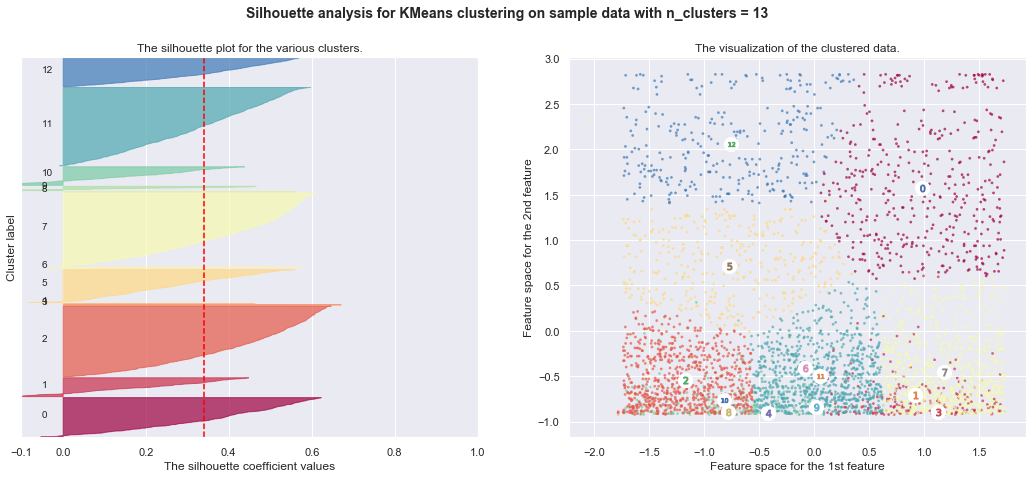

For n_clusters = 14 The average silhouette_score is : 0.34145913758297824


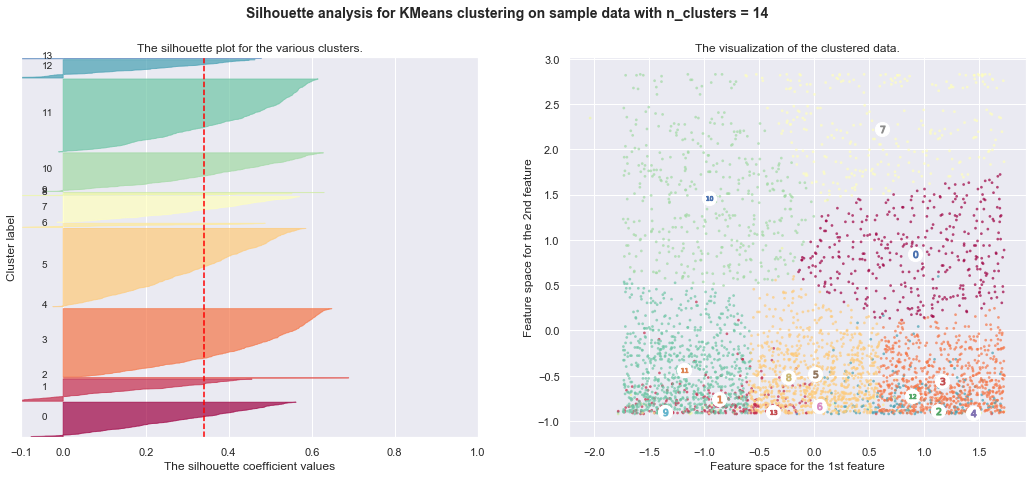

For n_clusters = 15 The average silhouette_score is : 0.3043824967507696


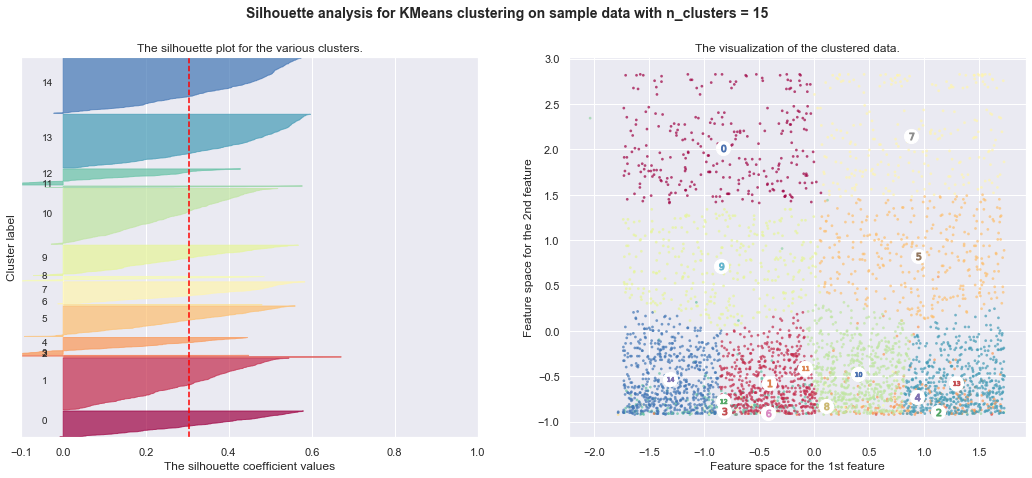

In [149]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init=15, random_state=2)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 6 The average silhouette_score is : 0.4024062237341105 maximum clusters without PCA

### applying pca

In [150]:
from scipy.stats import zscore
df_scaled = cust_df.apply(zscore)

In [151]:
df_scaled.head()

CustomerID   Recency  InvoiceNo     Sales
0    1.451539  2.816413   0.948847  0.471503
1   -1.594847 -0.610177   0.374843  0.183617
2   -1.150226  0.032937  -0.286410 -0.122399
3   -0.292696  2.424516  -0.401211 -0.132056
4   -0.171551 -0.670469   0.057992  0.374870

In [152]:
# cluster_range = range( 1, 15 )
# cluster_errors = []
# for num_clusters in cluster_range:
#   clusters = PCA(n_components=2)
#   pca.fit(cust_df_centered)
#   labels = clusters.labels_
#   centroids = clusters.cluster_centers_
#   cluster_errors.append( clusters.inertia_ )
# clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
# clusters_df[0:15]

In [153]:
from sklearn.decomposition import PCA

In [154]:
#cust_df_centered = cust_df - cust_df.mean(axis=0)

In [155]:
pca = PCA(n_components=2)
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [156]:
centroids=kmeans.cluster_centers_

In [157]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [158]:
centroid_df

CustomerID   Recency  InvoiceNo      Sales
0   -0.010799 -0.514926   0.054006   0.002491
1   -0.134087 -0.656401   8.435395  11.574613
2    0.033974  1.532843  -0.287918  -0.183272

In [159]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [160]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
cust_df_labeled = df_scaled.join(df_labels)

In [161]:
cust_clusters = cust_df_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
df0=cust_clusters.get_group(0)
df1=cust_clusters.get_group(1)
df2=cust_clusters.get_group(2)
finaldf = pd.concat([df0,df1,df2])
finaldf.head()

CustomerID   Recency  InvoiceNo     Sales labels
1   -1.594847 -0.610177   0.374843  0.183617      0
2   -1.150226  0.032937  -0.286410 -0.122399      0
4   -0.171551 -0.670469   0.057992  0.374870      0
5   -0.554014 -0.851345   1.086608  0.503539      0
6    1.425534 -0.760907  -0.134873  0.474270      0

In [162]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]

In [163]:
I0=0
I1=0
I2=0
for i in np.arange(df0.shape[0]):
  I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
  I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):  
  I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)
  

In [164]:
tot_I=I0+I1+I2
print(tot_I)

9382.337764510752


In [165]:
kmeans.inertia_

9382.337764510758

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.36248417376257586


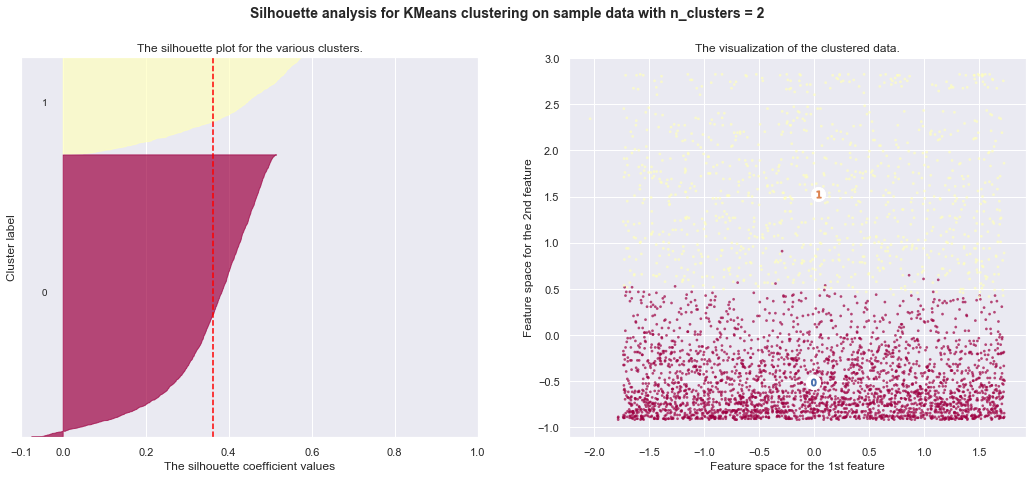

For n_clusters = 3 The average silhouette_score is : 0.38039028653820417


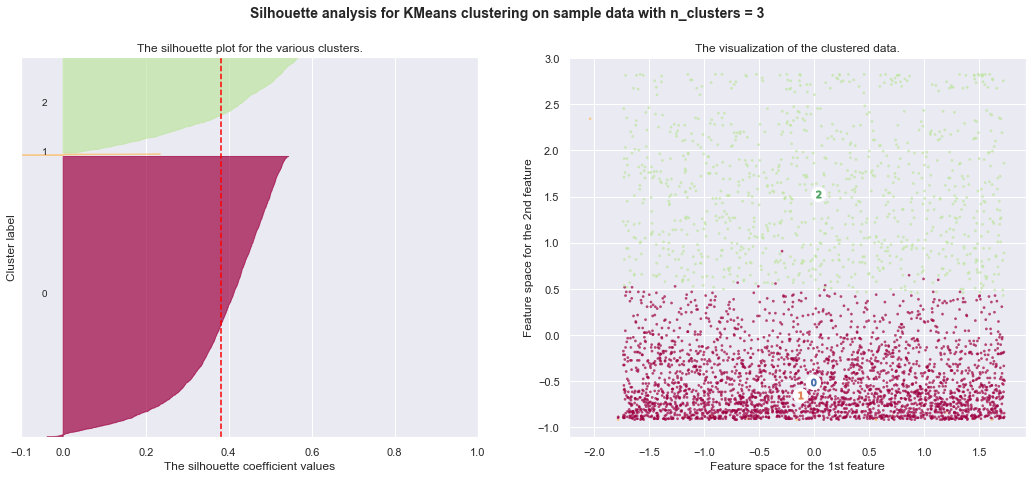

For n_clusters = 4 The average silhouette_score is : 0.3914199955816698


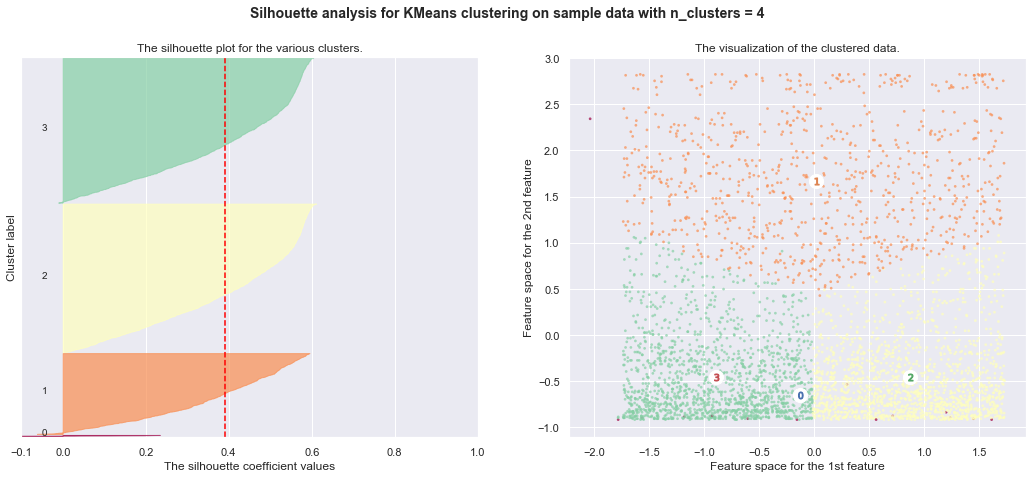

For n_clusters = 5 The average silhouette_score is : 0.38919336450697517


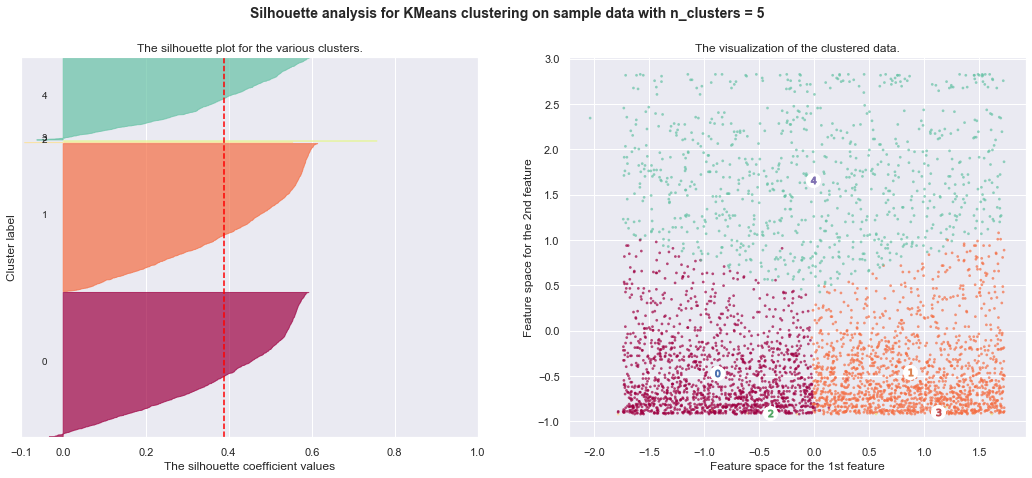

For n_clusters = 6 The average silhouette_score is : 0.4024062237341105


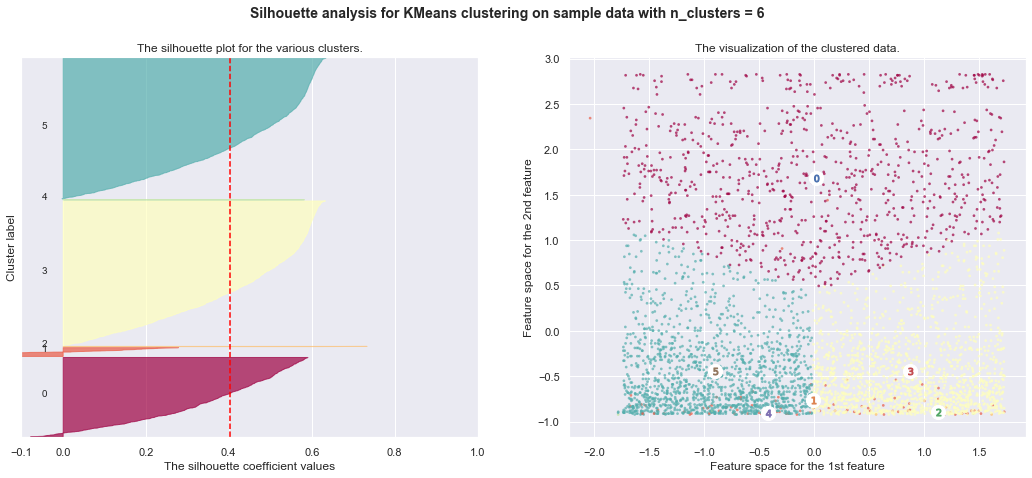

For n_clusters = 7 The average silhouette_score is : 0.40736972304885777


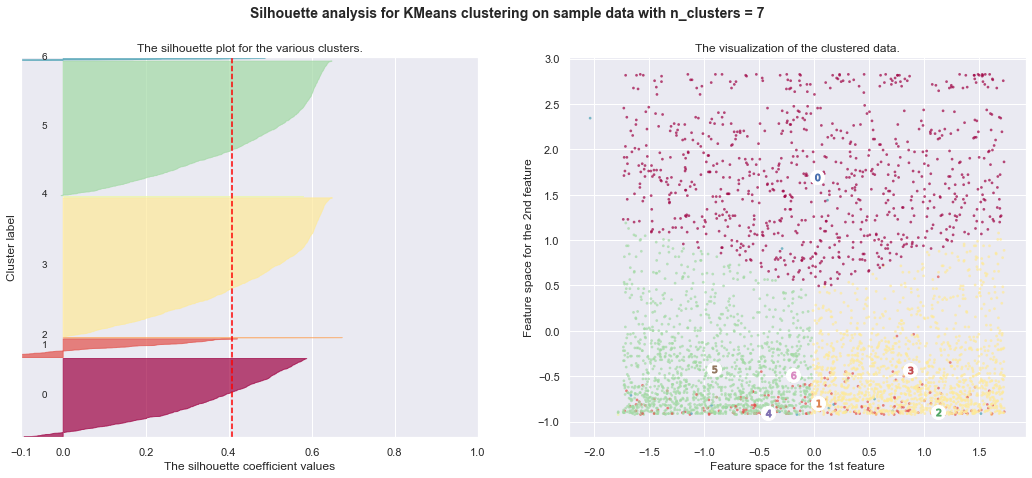

For n_clusters = 8 The average silhouette_score is : 0.40513356095399683


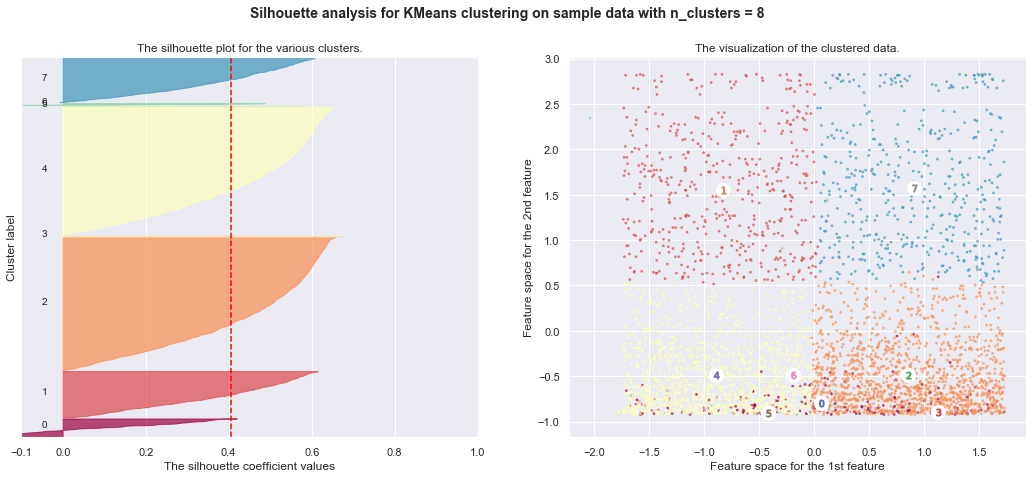

For n_clusters = 9 The average silhouette_score is : 0.3399574380150456


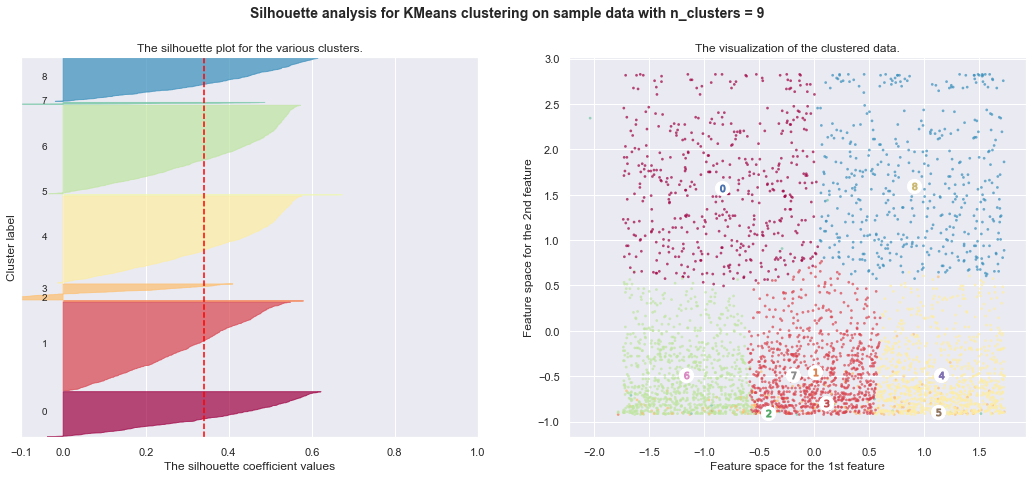

For n_clusters = 10 The average silhouette_score is : 0.34304506924250694


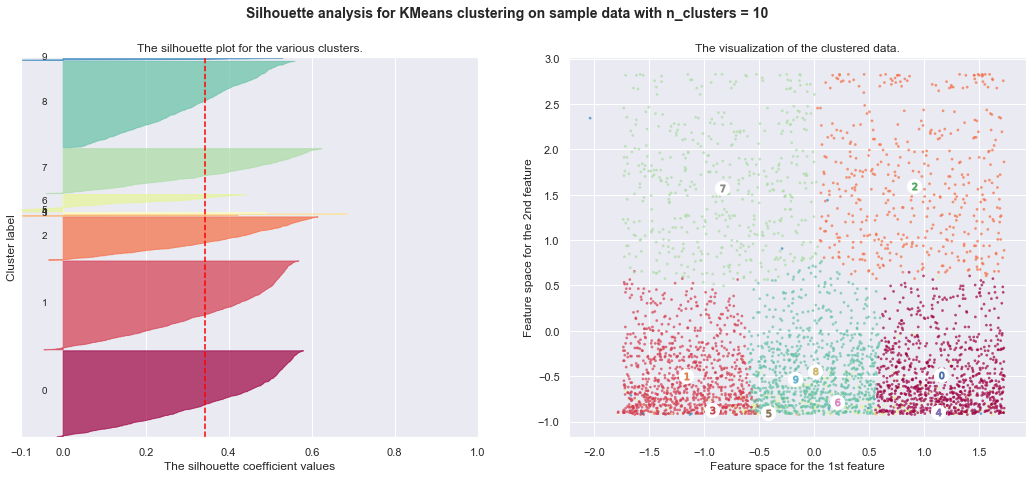

For n_clusters = 11 The average silhouette_score is : 0.3392414931267768


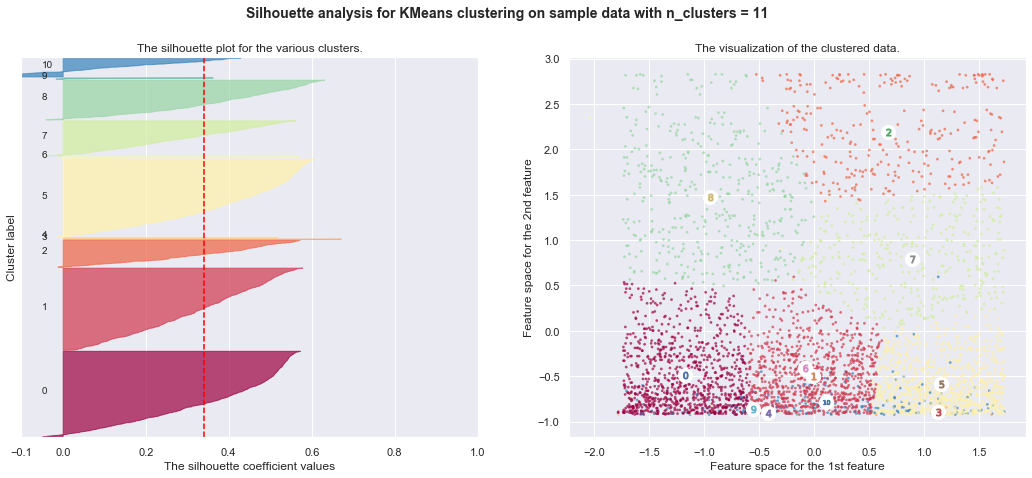

For n_clusters = 12 The average silhouette_score is : 0.28780859200858083


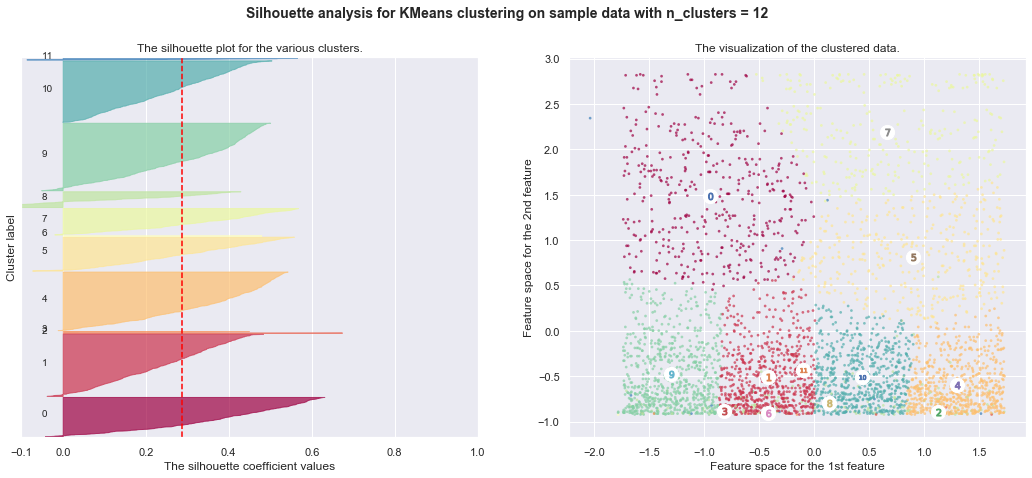

For n_clusters = 13 The average silhouette_score is : 0.3395067213979379


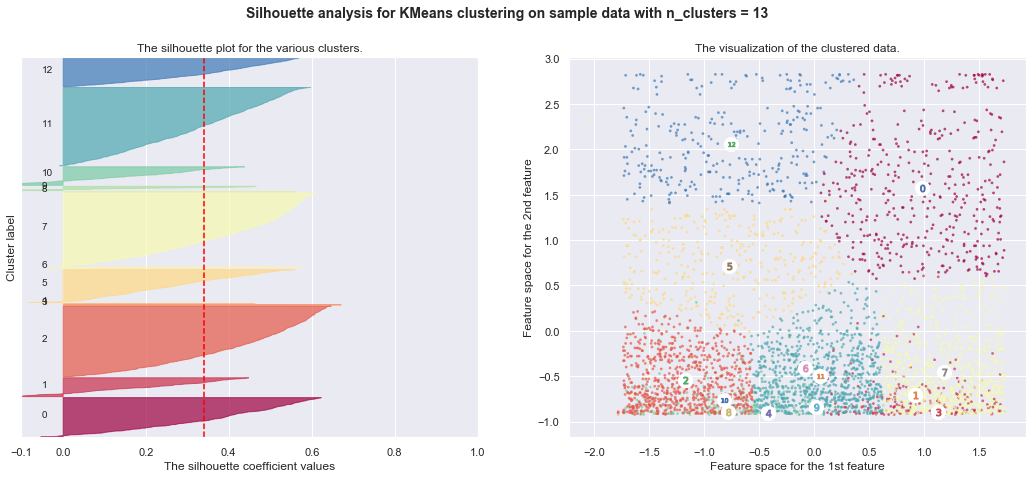

For n_clusters = 14 The average silhouette_score is : 0.34145913758297824


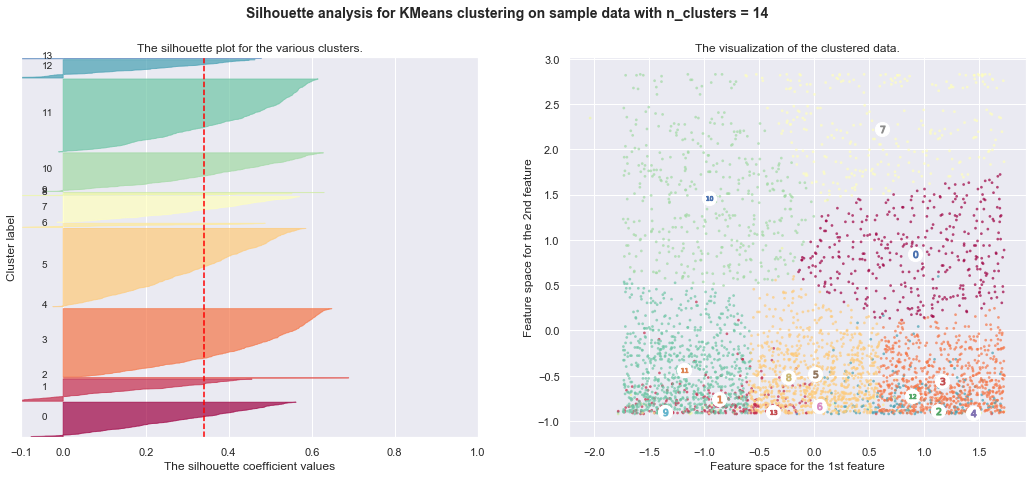

For n_clusters = 15 The average silhouette_score is : 0.3043824967507696


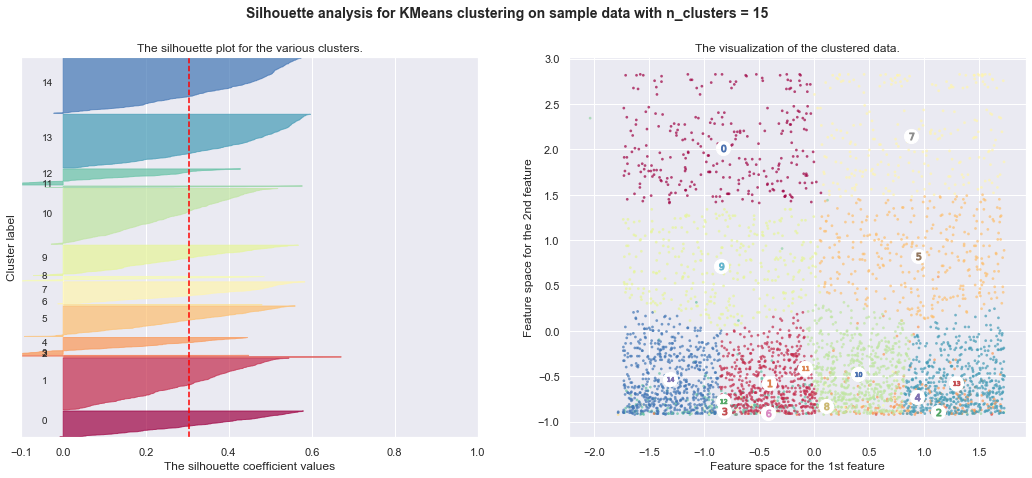

In [166]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init=15, random_state=2)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [167]:
cust_df_centered_pca = pca.transform(cust_df_centered)

In [168]:
cust_df_centered_pca.shape

(3921, 2)

In [169]:
pca.components_

array([[-0.00750006, -0.47063358,  0.6481855 ,  0.59858445],
       [ 0.99736473,  0.05653853,  0.01212807,  0.04381669]])

In [170]:
pca.explained_variance_

array([1.45721757, 1.00084513])

In [171]:
pca.explained_variance_ratio_

array([0.36421148, 0.25014747])

In [4]:
import numpy as np
x = [1,2,3,4,5]
np.var(x),np.std(x)

(2.0, 1.4142135623730951)